<div class="alert alert-info" align = "center"> <h1> KCHOUSE - Linear Regression Analysis </h1> </div>

---
---
<a id="content_table"></a>
# <font color=red> 1. Table of contents </font>

<b>[Part 1. Introduction](#introduction) </b><br>

<b>[Part 2. Setup](#setup)</b><br>
2.1) Setup<br>
2.2) Library<br>
2.3) Utitility functions<br>

<b>[Part 3. Data Preparation](#data_preparation)</b><br>
3.1) Load data<br>
3.2) Data Processing<br>

<b>[Part 4. Linear Regression Analysis](#lr_stats)</b><br>
4.1) Overview<br>
4.2) Train Linear Model using Stats package<br>
4.3) Result Summary<br>
4.4) Analysis of fitted model<br>
4.5) Linear model's assumptions and problems<br>
4.6) Examine violations<br>
4.7) Fixing the assumption in Linear Relationship</b><br>

<b>[Part 5. Linear Regression after fixing data](#lr_fixing)</b><br>
6.1) Train Linear Model using Stats package<br>
6.2) Result Summary<br>
6.3) Feature Selection<br>
6.4) Analysis of fitted model<br>

<b>[Part 6. Linear Regression using sklearn](#lr_sklearn)</b><br>
7.1) Train Linear Model using sklearn<br>
7.2) Result Summary<br>
7.3) Analysis of fitted model<br>

<b>[Part 7. Lasso Regression Model](#lasso)</b><br>
8.1) Overview<br>
8.2) Train Linear Model using sklearn<br>
8.3) Result Summary<br>
8.4) Analysis of fitted model<br>

### References:
1) <a src="https://www.kaggle.com/arthurtok/global-religion-1945-2010-plotly-pandas-visuals"> Global Religion 1945-2010: Plotly & Pandas visuals</a> by Anisotropic <br>

---
---
[content table](#content_table)
<a id="introduction"></a>
# <font color=red> 1. Introduction
    
This notebook performs the following tasks:
+ Data Preparation: preprocessing data for building predictive models
+ Building models: train linear regression 
+ Analyze fitted model
+ Fixing Linear assumptions to improve the model performance
+ Model evaluation techniques: involves using standard performance evaluation metrics like accuracy to evaluate model performance 
+ Model interpretation

---
---
[content table](#content_table)
<a id="setup"></a>
# <font color=red> 2. Setup

## <font color=blue> 2.1. Import library

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
from pathlib import Path
import os

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Dataframe manipulation
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, scale
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Modelling Helpers:
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, ShuffleSplit, cross_validate
from sklearn.feature_selection import RFECV

# statsmodels and math
import pylab
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels as statm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import math
from math import sqrt

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,ElasticNet,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
# Evaluation metrics for Regression 
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.svm import SVR
import xgboost as xgb

# to persist the model
import joblib
import datetime

C:\Users\Mai\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


### <font color=blue> 2.2. Configuration

In [2]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

# Configuration
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

# display various ranges 
pd.options.display.float_format = '{:.3f}'.format

# sns.set(style = 'whitegrid',context = 'notebook')
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

print("Setup complete...")

Setup complete...


### <font color=blue> 2.3. Define utility function

In [3]:
def analyze_continuous_var(var, target):   
    plt.figure(figsize=(20,5))
    
    # histogram
    plt.subplot(141)
    sns.distplot(var, bins=30)
    plt.title('Histogram')
    
    # Q-Q plot
    plt.subplot(142)
    stats.probplot(var, dist='norm', plot=pylab)
    plt.ylabel('Quantiles')
    
    # Boxplot
    plt.subplot(143)
    sns.boxplot(x=var)
    plt.title('Boxplot')
    
    # Scatter plot
    plt.subplot(144)
    plt.scatter(var, target, s=5)
    plt.title('Scatter plot')
    
    # Skewness and kurtosis
    print('Skewness: %f' % var.skew())
    print('Kurtosis: %f' % var.kurt())
    
    plt.show()

---
---
[content table](#content_table)
<a id="data_preparation"></a>
# <font color=red> 3. Data Preparation

### <font color=blue> 3.1. Load data

In [4]:
data_file = 'kc_house_data.csv'

df = pd.read_csv(data_file)
# backup data
df_bk = df.copy()
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


### <font color=blue> 3.2.  Define and seperate variables for preprocessing

In [5]:
# select features of interest
features = ['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
            'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 
            'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

target = 'price'

all_vars = features + [target]
print(all_vars)

# rename columns
FEATURE_MAP = {'date': 'date',
                'price': 'price'}

# data type conversion
DATA_TYPE = {'zipcode': 'str',
             'date': 'object',
             'price': 'float64',
             'bedrooms': 'int64',
             'bathrooms': 'int64',
             'sqft_living': 'int64',
             'sqft_lot': 'int64',
             'floors': 'int64',
             'waterfront': 'int64',
             'view': 'int64',
             'condition': 'int64',
             'grade': 'int64',
             'sqft_above': 'int64',
             'sqft_basement': 'int64',
             'yr_built': 'int64',
             'yr_renovated': 'int64',
             'lat': 'float64',
             'long': 'float64',
             'sqft_living15': 'int64',
             'sqft_lot15': 'int64'}

TARGET = 'price'
TEMPORAL_VARS = ['year']
TEXT_VARS = []
NUMERICAL_VARS = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
                  'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 
                  'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 
                  'sqft_living15', 'sqft_lot15']
CATEGORICAL_VARS = ['season']

TRAIN_NUMERICAL_VARS = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
                  'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 
                  'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 
                  'sqft_living15', 'sqft_lot15', 'sqft_ratio', 'zipcode']

# numerical variables with NA in train set
NUMERICAL_VARS_WITH_NA = []
# categorical variables with NA in train set
CATEGORICAL_VARS_WITH_NA = []
# variables to log transform
NUMERICALS_LOG_VARS = []

['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price']


#### files to store calculated data in processing step

### <font color=blue> 3.3. Data Processing - Define functions
    
This section is to perform data preprocessing which are identified after exploratory data analysis step. Instead of just doing this manually, it is more useful to create functions, for several good reasons:

+ This allows to reproduce these transformations easily on any dataset (e.g., the next time you get a fresh dataset)

+ Gradually build a libray of transformation functions that can be reused in future projects

+ Use these functions in live system to transform the new data before feeding it to your algorithms

+ This will make it possible to easily try various transformations and see which combination of transformations works best

For this dataset, these tasks will be performed for data preprocessing (refer notebook Data Exploratory Analysis for explanation):
1. Numeric data:
    + generate new var: sqft_ratio = sqft_living/sqft_living15
2. Categorical data:
    + Encode cat vars by calculating class ratio: ['zipcode']
    + Encode cat vars by creating dummy vars ['season']
3. temporal vars:
    + convert obj var to date time var: date
    + generate new var: season                                     
4. Handling missing data:
    + numeric data
    + categorical var
5. Scaling num var
                                   

#### Cleasing data

In [6]:
dummy_path = os.path.join('kchouse_train_dummy.npy')
ordinal_label_path = os.path.join('kchouse_OrdinalLabels.npy')
scaler_path = os.path.join('kchouse_scaler.pkl')

In [7]:
def clean_data(df):
    
    data = df.copy()
    
    # Standardize column name/ rename columns
    data.rename(columns=FEATURE_MAP, inplace=True)
    
    # data type conversion
    for key in DATA_TYPE:
        data[key] = data[key].astype(DATA_TYPE[key])
        
    # remove duplicated data
    data = data.drop_duplicates(keep='last')
    
    # select features of interest
    data = data[all_vars]
    
    # reset index
    data = data.reset_index(drop=True)
    
    return data

#### Data processing and transforming

In [8]:
# create feature season from column date
def generate_season(df, var):
    
    data = df.copy()
    data[var] = pd.to_datetime(data[var])
    data['month'] = data[var].apply(lambda x:x.month)
    data['year'] = data[var].apply(lambda x:x.year)
    data['season'] = 'N/A'
    data.loc[data.month.isin([12,1,2]), 'season'] = 'winter'
    data.loc[data.month.isin([3,4,5]), 'season'] = 'spring'
    data.loc[data.month.isin([6,7,8]), 'season'] = 'summer'
    data.loc[data.month.isin([9,10,11]), 'season'] = 'autumn'
    
    return data['season']


# generate feature sqft_ratio = sqft_living/sqft_living15
def sqft_ratio(df, var1, var2):
    
    data = df.copy()
    data['sqft_ratio'] = data[var1]/data[var2]
    
    return data['sqft_ratio']


# replace categorical var with ordinal label   
def encode_categorical(df, var_list, target, train_flag=0):
    
    data = df.copy()
    if(train_flag == 1):
        ordinal_label_dict = {}
        for var in var_list:
            ordered_label = df.groupby([var])[target].mean().sort_values().index
            ordinal_label = {k:i for i, k in enumerate(ordered_label, 0)}
            ordinal_label_dict[var] = ordinal_label
        # save the dictionary
        np.save(ordinal_label_path, ordinal_label_dict)
    else:
        ordinal_label_dict = np.load(ordinal_label_path, allow_pickle=True).item()
        
    for var in var_list:
        ordinal_label = ordinal_label_dict[var]
        data[var] = data[var].map(ordinal_label)
        
    return data


def create_dummy_vars(df, var_list, train_flag=0):
    
    data = df.copy()
    data_categorical = pd.DataFrame()
    for var in var_list:
        data_dummies = pd.get_dummies(data[var], prefix=var, prefix_sep='_', drop_first=True)
        data_categorical = pd.concat([data_categorical, data_dummies], axis=1)

    if(train_flag == 1):
        train_dummy =  list(data_categorical.columns)
        pd.Series(train_dummy).to_csv(dummy_path, index=False)
    else:
        test_dummy = list(data_categorical.columns)
        train_dummy = pd.read_csv(dummy_path)
        train_dummy.columns = ['Name']
        train_dummy = list(train_dummy.Name.values)
        
    for col in train_dummy:
        if col not in data_categorical:
            data_categorical[col] = 0
            
    return data_categorical


def scaling_data(df, var_list, train_flag=0):
    
    data = df.copy()
    if(train_flag == 1):
        # fit scaler
        scaler = MinMaxScaler()
        scaler.fit(data[var_list])
        joblib.dump(scaler, scaler_path)
    scaler = joblib.load(scaler_path)
    
    scaled_data = pd.DataFrame(scaler.transform(data[var_list]), columns=var_list)
    
    return scaled_data
        

outlier_dict = {'bedrooms': 10,
                'bathrooms': 5, 
                'floors': 3, 
                'sqft_living':4610, 
                'sqft_living15':3770, 
                'sqft_lot':43560, 
                'sqft_lot15':19647, 
                'sqft_above':4070.0, 
                'sqft_basement':1150, 
                }

def fixing_outliers(df, outlier_dict):
    
    data = df.copy()
    for var in outlier_dict:
        df.loc[df[var] >= outlier_dict[var], var] = outlier_dict[var]
    
    return data

#### Preprocessing Pipeline

In [9]:
def data_engineering_pipeline(df, train_flag=0):
    
    print('train_flag:', train_flag)
    # clean data
    df = clean_data(df)
    # yr_renovated
    df.loc[df['yr_renovated'] > 0, 'yr_renovated'] = 1
    # generate season feature
    df['season'] = generate_season(df, 'date')
    # create sqft_ratio feature
    df['sqft_ratio'] = sqft_ratio(df, 'sqft_living', 'sqft_living15')
    # encode zipcode
    df = encode_categorical(df, ['zipcode'], TARGET, train_flag)
    # fixing outliers
    # df = fixing_outlierss(df, outlier_dict)
    # scaling numerical var
    num_df = scaling_data(df, TRAIN_NUMERICAL_VARS, train_flag)
    # create dummy vars for categorical vars
    cat_df = create_dummy_vars(df, ['season'], train_flag)
    # merge num_df and cat_df
    df = pd.concat([num_df, cat_df], axis=1)
    
    return df

## <font color=blue> 3.4. Data Processing - Apply to Train set and Test set

#### split data

In [10]:
# split data
X_train, X_test, y_train, y_test = train_test_split(df, df[TARGET], test_size=0.2, random_state=0)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

#### preprocessing data

In [11]:
X_train = data_engineering_pipeline(X_train, train_flag=1)
X_test = data_engineering_pipeline(X_test)
TRAIN_VARS = list(X_train.columns)
new_obj = pd.DataFrame(X_test.iloc[0]).T

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

df_train.head()

train_flag: 1
train_flag: 0


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,sqft_ratio,zipcode,season_spring,season_summer,season_winter,price
0,0.091,0.125,0.097,0.003,0.000,0.000,0.000,0.750,0.500,0.086,0.104,0.348,0.000,0.866,0.163,0.240,0.007,0.122,0.710,0,0,1,495000.000
1,0.091,0.250,0.112,0.006,0.000,0.000,0.000,0.750,0.583,0.101,0.118,0.696,0.000,0.646,0.304,0.335,0.010,0.102,0.899,0,1,0,635000.000
2,0.091,0.125,0.060,0.006,0.000,0.000,0.000,0.500,0.583,0.088,0.000,0.757,0.000,0.756,0.399,0.230,0.011,0.079,0.812,1,0,0,382500.000
3,0.121,0.250,0.145,0.004,0.500,0.000,0.000,0.500,0.583,0.211,0.000,0.809,0.000,0.426,0.276,0.275,0.007,0.162,0.130,0,1,0,382500.000
4,0.091,0.250,0.114,0.003,0.500,0.000,0.000,0.500,0.500,0.104,0.116,0.739,0.000,0.788,0.127,0.244,0.005,0.142,0.884,0,0,0,670000.000


---
---
[content table](#content_table)
<a id="lr_stats"></a>
# <font color=red> 4.Linear Regression Analysis
    
### <font color=blue> 4.1. Overview    
1. It is an approach for modeling the linear relationship between X and Y, the true function has the form
    
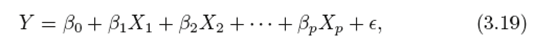
    
(where Xj represents the jth predictor and βj quantifies the association between that variable and the response. We interpret βj as the average effect on Y of a one unit changed in Xj, holding all other predictors fixed)
    
2. The model is trained by finding best parameters which return the least sum of squared errors
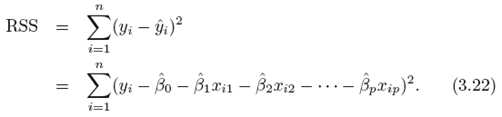

### <font color=blue> 4.2. Train Model using Stasts Package

In [12]:
import statsmodels.api as sm

# Add a constant (add a new column, which consists only of 1s)
X_bias = sm.add_constant(X_train)

# Fit the model
lr_model = sm.OLS(y_train, X_bias).fit()

### <font color=blue> 4.3. Result Summary

In [13]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     2661.
Date:                Sat, 12 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:51:02   Log-Likelihood:            -2.3385e+05
No. Observations:               17290   AIC:                         4.677e+05
Df Residuals:                   17268   BIC:                         4.679e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.151e+05   1.68e+04     -6.834      0.000   -1.48e+05   -8.21e+04
bedrooms       -7.37e+05   6.23e+04    -11.828      0.000   -8.59e+05   -6.15e+05
bathrooms      3.263e+05   2.32e+04     14.043      0.000    2.81e+05    3.72e+05
sqft_living    1.636e+06   3.32e+04     49.275      0.000    1.57e+06     1.7e+06
sqft_lot       3.375e+05   8.03e+04      4.201      0.000     1.8e+05    4.95e+05
floors        -5.484e+04   7374.894     -7.436      0.000   -6.93e+04   -4.04e+04
waterfront     6.111e+05   1.69e+04     36.092      0.000    5.78e+05    6.44e+05
view           1.978e+05   8584.049     23.047      0.000    1.81e+05    2.15e+05
condition      9.676e+04   9455.220     10.233      0.000    7.82e+04    1.15e+05
grade          7.516e+05   2.67e+04     28.141      0.000    6.99e+05    8.04e+05
sqft_above     1.982e+06   3.94e+04     50.353      0.000     1.9e+06    2.06e+06
sqft_basement  7.474e+05   2.46e+04     30.398      0.000    6.99e+05    7.96e+05
yr_built      -1.543e+05   8588.033    -17.963      0.000   -1.71e+05   -1.37e+05
yr_renovated   4.727e+04   7240.351      6.529      0.000    3.31e+04    6.15e+04
lat            2.203e+04   8303.237      2.653      0.008    5755.088    3.83e+04
long           -3.61e+05   1.48e+04    -24.393      0.000    -3.9e+05   -3.32e+05
sqft_living15 -8.625e+05   4.17e+04    -20.686      0.000   -9.44e+05   -7.81e+05
sqft_lot15    -2.348e+05    6.5e+04     -3.610      0.000   -3.62e+05   -1.07e+05
sqft_ratio    -1.649e+06   7.06e+04    -23.363      0.000   -1.79e+06   -1.51e+06
zipcode        4.741e+05   7361.197     64.400      0.000     4.6e+05    4.88e+05
season_spring  2.655e+04   3799.481      6.988      0.000    1.91e+04     3.4e+04
season_summer  -327.3158   3827.773     -0.086      0.932   -7830.139    7175.507
season_winter  5939.1655   4384.599      1.355      0.176   -2655.093    1.45e+04
==============================================================================
Omnibus:                    14975.065   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1765690.287
Skew:                           3.621   Prob(JB):                         0.00
Kurtosis:                      51.974   Cond. No.                     4.38e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.99e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [14]:
result_df = pd.DataFrame({'coef': lr_model.params, 'p-value':round(lr_model.pvalues,3)}).sort_values(['coef'], ascending=False)
result_df

,coef,p-value
sqft_above,1982104.531,0.000
sqft_living,1636175.446,0.000
grade,751595.212,0.000
sqft_basement,747413.140,0.000
waterfront,611130.595,0.000
zipcode,474064.151,0.000
sqft_lot,337524.624,0.000
bathrooms,326324.534,0.000
view,197833.508,0.000
condition,96756.931,0.000


In [15]:
print('R-squares: {}'.format(lr_model.rsquared))

R-squares: 0.763952125215569


### <font color=blue> 4.4 Interpretation of the model's result
1. **Goodness-of-fit (R-Squared)**: R-squared takes the form of a proportion – the proportion of variance explained – and so it always takes on a value between 0 and 1, and is independent of the scale of Y. An R2 value close to 1 indicates that the model explains a large portion of the variance in the response variable
    

2. **Coefficient values**: We interpret coefficient βj as the average change on Y of a one unit changed in Xj, holding all other predictors fixed
    + There are few features with high p-value (season_winter, season_summer). This indicates that these features are not statistically significant in Linear Regression model, hence it is not useful and necessary for the model
    + Coefficients with positive values means higher values results in higher price. The highest positive coeffient are sqft_living, sqft_above. 
    + The coefficients yr_built is negative which means old houses have low prices
    + Features have negative coefficients  such as including **bedrooms, sqft_living15, sqft_lot15, sqft_ratio** are quite strange and should be investigated because the result seem to be different from the exploratory data analysis which expected that higher these values goes with higher house prices. This is because linear regression models often suffers from many problems due to the violation of linear assumptions such as existing outliers, olinearity in  independent vars. To understand this further, we can analyze the result of the fitted model

### <font color=blue> 4.5. Analysis of fitted model
    
### 1. Linear model's assumptions and violations
    
The standard linear regression model provides interpretable results and works quite well on many real-world problems. However, it makes several highly restrictive assumptions that are often violated in practice.

1. **Linear relationship**: There is a linear relationship between X and the outcome Y   

    
2.	**Normality and Homoscedasticity of error terms**: 
    + Homoscedasticity describes a situtaion in which the error term has normal distribution with zero mean, and variance is not changed across all values of the independent variables (the correlation between the residuals and fitted values is 0 as well).
    + Heteroscedsticity (Non-constant variance of error terms): it is often the case that the variances of the error terms are non-constant. It may increase with the value of response
    
    
3. **No autocorrelation**:Errors are assumed to be uncorrelated, which means it't not dependent observations (timeseries data)
    
    
4. **No Multi-colinearity**: Variables should not be correlated or there is no or little co-linearity among the independent variables. The presence of collinearity can pose problems in the regression context, since it can be difficult to separate out the individual effects of collinear variables on the response. Multiple regression may not be able to determine which is the important one. Problem with Multicolinearity:
    + Loss of reliability
    + High variability in coefficients estimates (unstable coefficients)
    + Strange findings
    
    
5. **The effect of outliers and high-leverage points**: 
    + Outliers are observations for y lies far from value predicted by the model. In this case, removing the outlier has little effect on the least squares line: it leads to almost no change in the slope, and a miniscule reduction in the intercept. However, outlier may cause problem. For ex, the RSE is 1.09 when the outlier is included in the regression, but it is only 0.77 when the outlier is removed. Since RSE is used to compute all confidence intervals and p-values, such a dramatic increase caused by a single data point can have implications for the interpretation of the fit
    + High leverage is unusual value of $x_i$ in observations. they will affect the regression dramatically in cost coefficients to be inflated as the regression will try to place the line closer to those values. An outlier that makes a considerable difference to the least-squares line when removed is called influential point
    
    
6. **Synergy effect/ Interaction term**:  Two of the most important assumptions state that the relationship between the predictors and response are additive and linear
    + The additive assumption: means that the effect of changes in a predictor Xj on the response Y is independent of the values of the other predictor. An additive model is easy to interpret because the effect of each predictor on the response is unrelated to the values of the other predictors. However, the additive assumptions may be unrealistic for certain data sets
    
   + One way of extending this model to allow for interaction effects is to include a third predictor, called an interaction term, which is constructed by computing the product of X1 and X2. This results in the model
 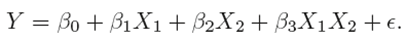
    
Failure to meet one or more of the model assumptions may end up in a poor model performance. If the assumptions are not met, we can try a different machine learning model or transform the input variables so that they fulfill the assumptions

###  2. Analysis of resisual plot for checking violations of  assumptions

+ Typically scatter plots between residuals and predictions are used to confirm the assumption. If the plot of residuals versus fitted values shows no substantial trend or curve, and is homoscedastic that is the vertical spread does not vary too much along the horizontal length of plot, except perhaps near the edges, then it is likely, but not certain, that the assumptions of the linear model hold. 

+ However, if the residual plot does show a substantial trend or curve, or is heteroscedastic, that can be identified from the presence of a funnel shape in the residual plot when the magnitude of the residuals tends to increase with the fitted values, it is certain that the assumptions of the linear model do not hold. 

+ In summary, a good-looking residual plot does not itself prove that the linear model is appropriate, because the assumptions of the linear model can fail in other ways. On the other hand, a residual plot with a serious defect does clearly indicate that the linear model is inappropriate

+ Residual plots can also be used to identify outliers.

In [16]:
# helper functions for ploting residual plots
def plot_residual(ax1, ax2, ax3, ax4, y_pred, y_real, line_label, title):
    ax1.scatter(y_real, y_pred, color='blue', alpha=0.6, label=line_label)
    ax1.set_ylabel('Predicted Y')
    ax1.set_xlabel('Real Y')
    ax1.legend(loc='best')
    ax1.set_title(title)
    
    ax2.scatter(y_pred, y_real - y_pred, color='green', marker='x', alpha=0.6, label='Residual')
    ax2.set_xlabel('Predicted Y')
    ax2.set_ylabel('Residual')
    ax2.axhline(y=0, color='black', linewidth=2.0, alpha=0.7, label='y=0')
    ax2.legend(loc='best')
    ax2.set_title('Residual plot')
    
    ax3.hist(y_real - y_pred, bins=50, color='green', alpha=0.7)
    ax3.set_title("Histogram of residual values")
    
    stats.probplot(y_real - y_pred, plot=ax4)
    ax4.set_title('Q-Q plot of residual values')
    
    return ax1, ax2, ax3, ax4

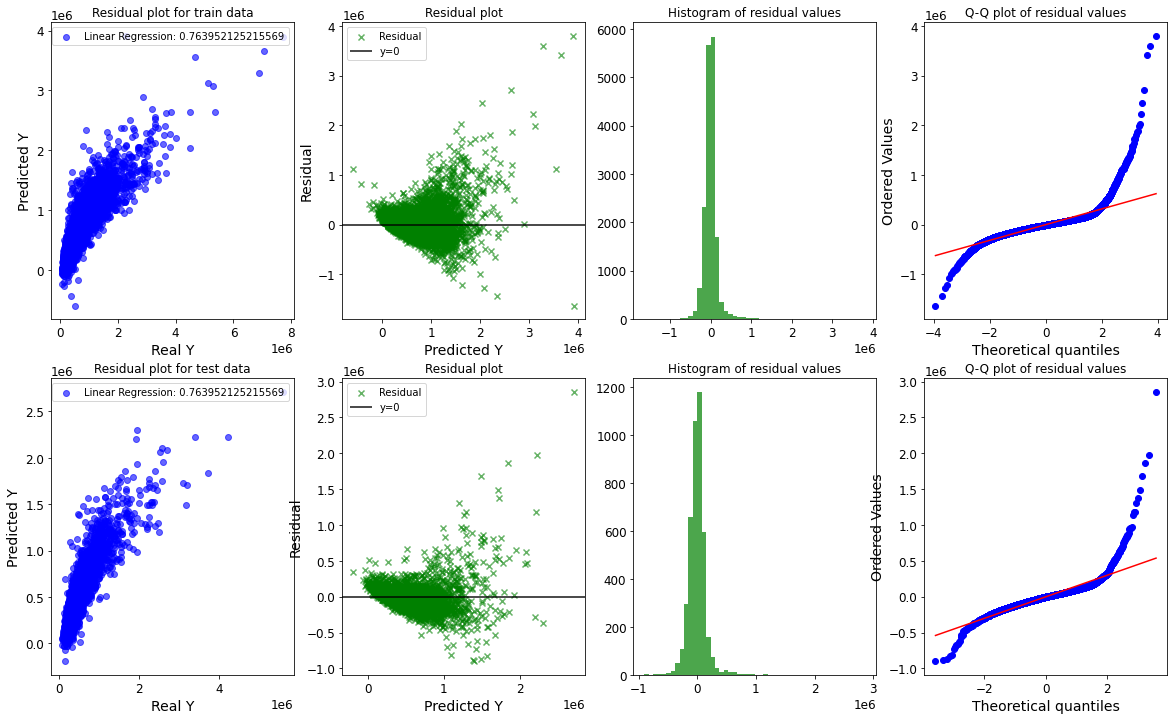

In [17]:
train_pred = lr_model.predict(X_bias)
test_pred = lr_model.predict(sm.add_constant(X_test))

fig, axes = plt.subplots(2,4,figsize=(20,12))
plot_residual(axes[0][0],axes[0][1],axes[0][2],axes[0][3],train_pred,y_train,'Linear Regression: {}'.format(lr_model.rsquared),'Residual plot for train data')
plot_residual(axes[1][0],axes[1][1],axes[1][2],axes[1][3],test_pred,y_test,'Linear Regression: {}'.format(lr_model.rsquared),'Residual plot for test data')
fig.show()

- ***Predicted y vs. real y***: It seems there is relatively good fit for small price value, but the model does not predict well towards the high house prices. For high house prices, the model under-estimate the price.
    
- ***residual vs. prediction***: The vertical spread clearly increases with high fitted values because higher predictied values showed higher error,  hence the variances of the error terms are non-constant. This indicates a violation of the assumption of constant error variance.  With this problem, one possible solution is to transform the repsonse Y using a concave function such as log Y or sqrt Y. Such a transformation results in a greater amount of shrinkage of a larger responses, leading to a reduction in heteroscedasticity. 

- ***Residuals distribution***: The the errors doesn't follow Gaussian distribution, it's skewed on the right. It indicates that the data is not linear relationship

- **QQ plot**: for small prices, the quantiles of residual are more aligned over the 45 degree line with the theoretical quantiles of the Gaussian distribution, however, for very high prices, the residuals lie very far from the red line, this indicates that data exists outliers

### 3.  Examine Multicolinearity

The formal statistic test for testing Multicolinearity is Variance Inflation Factor (VIF). It allows to monitor if moving a feature causes a dramatic change in our parameters. It spits out a number that quantifies the severity of multicollinearity, so in effect we get a number and compare with a threshold

+ Step 1: So what will happen is that we will look to explain an independent values as a linear combination of all the other features in the dataset. 

$$ Var_k = \alpha _0 + \alpha _1 Var1 + \alpha _2 Var2+ ... + \alpha _{p}Varp $$

+ Step 2: Calculate. The r-squared here is the r-squared from trying to explain a given feature in terms of all the other features in the dataset 

$$ VIF _{k} = \frac{1}{(1 - R _{k} ^ 2)} $$

To determine co-linearity, we use The IAF produces a measure which estimates how much larger the square root of the standard error of an estimate is compared to a situation where the variable was completely uncorrelated with the other predictors

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_train[TRAIN_VARS].values, i) for i in range(len(TRAIN_VARS))]
vif['features']  = TRAIN_VARS
vif

,VIF,features
0,22.055,bedrooms
1,16.032,bathrooms
2,inf,sqft_living
3,2.503,sqft_lot
4,3.603,floors
5,1.231,waterfront
6,1.582,view
7,15.609,condition
8,83.916,grade
9,inf,sqft_above


+ When VIF is 1, it means that there is no multiple linearity at all. This is also the minimum value of the measure
+ Generally, values between 1 and 10 are acceptable
+ Values above 10 is considered problematic and would need closer inspection

=> From vif summary table, it can be clearly see that many variables have high VIF, we should remove vars to reduce the VIF values

# <font color=red>5. Fixing the assumption in linear relationship

In summary, our model is suffering from many problems including non-linearity data, existing outliers, multi-colinearity. Failure to meet one or more of the model assumptions may end up in a poor model performance. If the linear assumptions are not met, we can try 
- Mathematical transformation of the variables to transform from non-linear relationship to linear relationship
- Handling outliers to elivate the effect
- Remove vars with high co-linearity
- Try with different machine learning models

### <font color=blue> 5.1. Transform var to have a more linear relationship
    
As explained, in order to reduce heavily skewed price, one possible solution is to transform the repsonse Y using a concave function such as log Y or sqrt Y. Such a transformation results in a greater amount of shrinkage of a larger responses, leading to a reduction in heteroscedasticity.

In [20]:
df_train['log_price'] = np.log(df_train['price'])
df_test['log_price'] = np.log(df_test['price'])

Skewness of price: 4.129383
Kurtosis of price: 36.366127

Skewness of log_price: 0.422588
Kurtosis of log_price: 0.735192


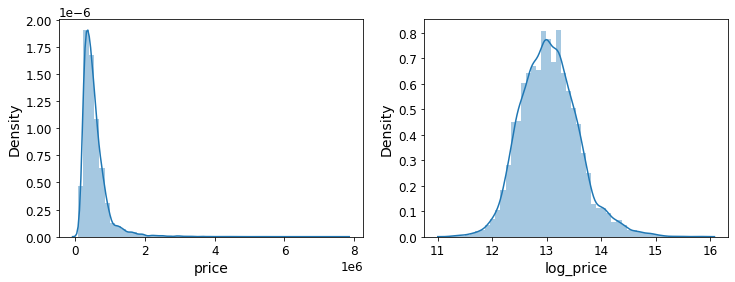

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.distplot(df_train['price'], ax=ax[0])
sns.distplot(df_train['log_price'], ax=ax[1])

# Measure skewness and kurtosis
print("Skewness of price: %f" %df_train['price'].skew())
print("Kurtosis of price: %f" %df_train['price'].kurt())
print()
print("Skewness of log_price: %f" %df_train['log_price'].skew())
print("Kurtosis of log_price: %f" %df_train['log_price'].kurt())

We can see that after the transformation, the distribution is less skewed. Skewness = 0.4 => it's much closer to 0

In [22]:
y_train = df_train['log_price']
y_test = df_test['log_price']

#### Train as multiple linear regression model

In [23]:
import statsmodels.api as sm

# Add a constant (adding a new column (equal in lenght to x), which consists only of 1s)
X_bias = sm.add_constant(X_train)
# Fit the model
lr_model = sm.OLS(y_train, X_bias).fit()

#### Result Summary & Interpretation

In [24]:
pd.options.display.max_rows = 300
pd.set_option('display.float_format', lambda x: '%.3f' % x)
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     4863.
Date:                Tue, 08 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:28:24   Log-Likelihood:                 3193.7
No. Observations:               17290   AIC:                            -6343.
Df Residuals:                   17268   BIC:                            -6173.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.1770      0.019    596.739      0.000      11.140      11.214
bedrooms         -0.1060      0.069     -1.531      0.126      -0.242       0.030
bathrooms         0.2899      0.026     11.220      0.000       0.239       0.341
sqft_living       0.3945      0.037     10.688      0.000       0.322       0.467
sqft_lot          1.1647      0.089     13.038      0.000       0.990       1.340
floors            0.0324      0.008      3.957      0.000       0.016       0.049
waterfront        0.4156      0.019     22.080      0.000       0.379       0.453
view              0.2335      0.010     24.470      0.000       0.215       0.252
condition         0.2085      0.011     19.836      0.000       0.188       0.229
grade             1.1815      0.030     39.793      0.000       1.123       1.240
sqft_above        0.5306      0.044     12.124      0.000       0.445       0.616
sqft_basement     0.0807      0.027      2.952      0.003       0.027       0.134
yr_built         -0.1492      0.010    -15.628      0.000      -0.168      -0.130
yr_renovated      0.0623      0.008      7.743      0.000       0.047       0.078
lat               0.2676      0.009     28.994      0.000       0.250       0.286
long             -0.4425      0.016    -26.892      0.000      -0.475      -0.410
sqft_living15     0.9487      0.046     20.466      0.000       0.858       1.040
sqft_lot15       -0.2905      0.072     -4.018      0.000      -0.432      -0.149
sqft_ratio        1.2708      0.078     16.193      0.000       1.117       1.425
zipcode           0.8312      0.008    101.573      0.000       0.815       0.847
season_spring     0.0497      0.004     11.775      0.000       0.041       0.058
season_summer     0.0064      0.004      1.509      0.131      -0.002       0.015
season_winter     0.0110      0.005      2.247      0.025       0.001       0.021
==============================================================================
Omnibus:                      976.866   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2966.700
Skew:                          -0.263   Prob(JB):                         0.00
Kurtosis:                       4.960   Cond. No.                     4.38e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.99e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Dealing with high leverage points

High leverage observations tend to have a substantial impact on the estimated regression line. It is cause for concern if the least squares line is heavily affected by just a couple of observations because any problems with these points may invalidate the entire fit. One possible solution is we can adjust the high-leverage points to a threshold value to alliviate the effect of them

In [25]:
df = df_bk.copy()

# split data
df_train, df_test = train_test_split(df,test_size=0.2, random_state=0)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train['log_price'] = np.log(df_train['price'])
df_test['log_price'] = np.log(df_test['price'])

In [26]:
# function to find upper and lower boundaries for normally distributed variables
def find_normal_boundaries(var):
    upper_boundary = var.mean() + 3 * var.std()
    lower_boundary = var.mean() - 3 * var.std()
    
    print('upper_boundary, lower_boundary: ', upper_boundary, lower_boundary)
    print('total number of var: {}'.format(len(var)))
    print('number of data points with more than upper_boundary (right end outliers): {}'.format(
        (var > upper_boundary).sum()))
    print('number of data points with less than lower_boundary (left end outliers: {}'.format(
        (var < lower_boundary).sum()))
    print('% right end outliers: {}'.format((var > upper_boundary).sum() / len(var)))
    print('% left end outliers: {}'.format((var < lower_boundary).sum() / len(var)))
    
    return upper_boundary, lower_boundary

def find_skewed_boundaries(var, distance):
    # distance passed as an argument, give us the option 
    # to estimate 1.5 times or 3 times the IQR to calculate the boundaries
    IQR = var.quantile(0.75) - var.quantile(0.25) 
    lower_boundary = var.quantile(0.25) - (IQR * distance)
    upper_boundary = var.quantile(0.75) + (IQR * distance)
    
    print('upper_boundary, lower_boundary: ', upper_boundary, lower_boundary)
    print('total number of var: {}'.format(len(var)))
    print('number of data points with more than upper_boundary (right end outliers): {}'.format(
        (var > upper_boundary).sum()))
    print('number of data points with less than lower_boundary (left end outliers: {}'.format(
        (var < lower_boundary).sum()))
    print('% right end outliers: {}'.format((var > upper_boundary).sum() / len(var)))
    print('% left end outliers: {}'.format((var < lower_boundary).sum() / len(var)))
    
    return upper_boundary, lower_boundary

In [27]:
outlier_vars = ['sqft_living','sqft_living15','sqft_lot', 'sqft_lot15', 'sqft_above', 'bedrooms','sqft_basement']

for var in ['sqft_lot', 'sqft_lot15','sqft_basement']:
    print(var)
    find_skewed_boundaries(df_train[var], 1.8)
    print()
    
for var in ['sqft_living','sqft_living15','sqft_above', 'yr_built']:
    print(var)
    find_skewed_boundaries(df_train[var], 2.5)
    print()

sqft_lot
upper_boundary, lower_boundary:  20936.550000000003 -5190.300000000001
total number of var: 17290
number of data points with more than upper_boundary (right end outliers): 1783
number of data points with less than lower_boundary (left end outliers: 0
% right end outliers: 0.10312319259687681
% left end outliers: 0.0

sqft_lot15
upper_boundary, lower_boundary:  19098.6 -3899.1000000000004
total number of var: 17290
number of data points with more than upper_boundary (right end outliers): 1643
number of data points with less than lower_boundary (left end outliers: 0
% right end outliers: 0.09502602660497397
% left end outliers: 0.0

sqft_basement
upper_boundary, lower_boundary:  1596.0 -1026.0
total number of var: 17290
number of data points with more than upper_boundary (right end outliers): 217
number of data points with less than lower_boundary (left end outliers: 0
% right end outliers: 0.012550607287449392
% left end outliers: 0.0

sqft_living
upper_boundary, lower_boundary

In [28]:
outlier_vars = ['sqft_living','sqft_living15','sqft_lot', 'sqft_lot15', 'sqft_above', 'bedrooms','sqft_basement']

for var in ['sqft_lot', 'sqft_lot15','sqft_basement']:
    threshold = df_train[var].quantile(0.95)
    print(var + ' ' + str(threshold) + ', num of observations: ' + str(len(df_train[df_train[var] > threshold])))
    df_train = df_train[df_train[var] < threshold]
    df_test = df_test[df_test[var] < threshold]
    
for var in ['sqft_living','sqft_living15','sqft_above']:
    threshold = df_train[var].quantile(0.99)
    print(var + ' ' + str(threshold) + ', num of observations: ' + str(len(df_train[df_train[var] > threshold])))
    df_train = df_train[df_train[var] < threshold]
    df_test = df_test[df_test[var] < threshold]    

sqft_lot 43560.0, num of observations: 852
sqft_lot15 19647.59999999999, num of observations: 822
sqft_basement 1150.0, num of observations: 766
sqft_living 4218.199999999997, num of observations: 149
sqft_living15 3640.0, num of observations: 146
sqft_above 3628.199999999997, num of observations: 146


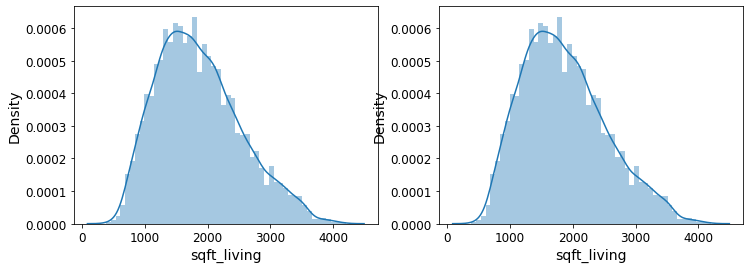

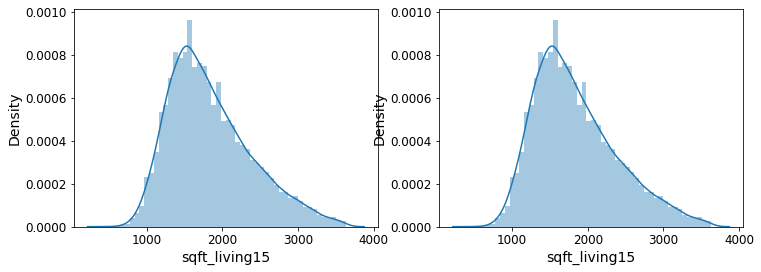

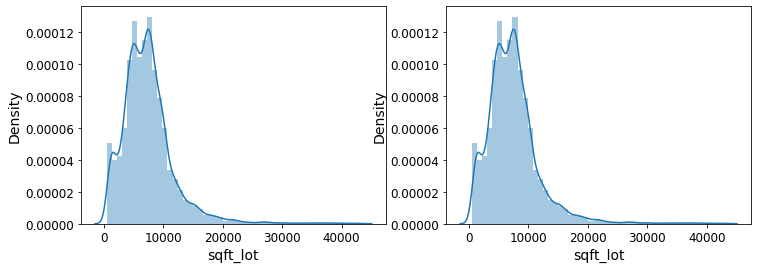

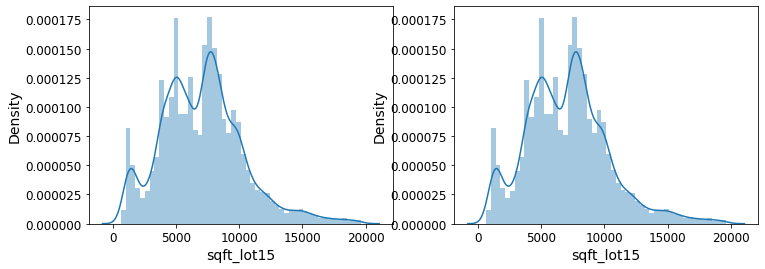

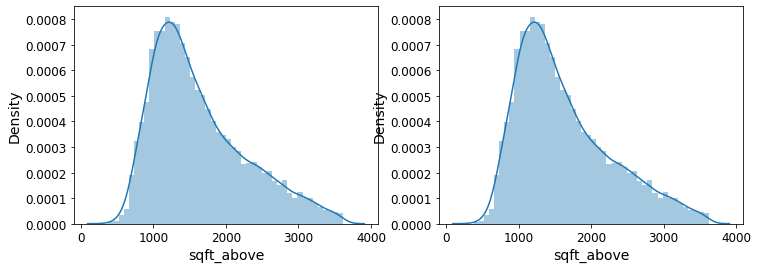

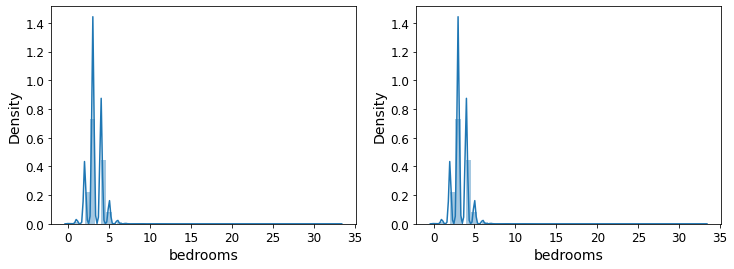

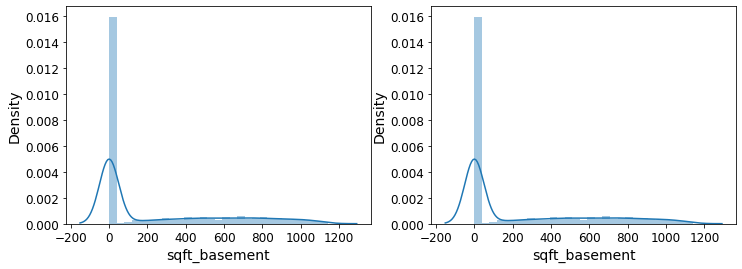

In [29]:
for var in outlier_vars:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
    sns.distplot(df_train[var], ax=ax[0])
    sns.distplot(df_train[var], ax=ax[1])
    plt.show()

sqft_living
Skewness: 0.532093
Kurtosis: -0.167472


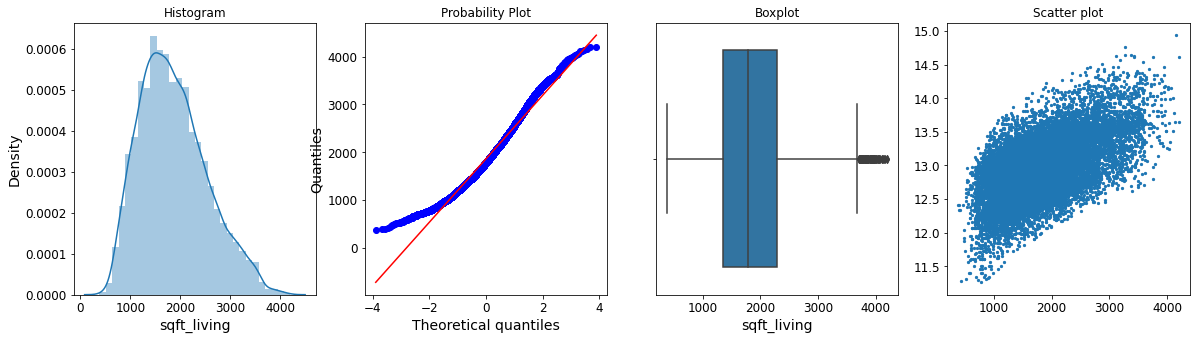

sqft_living15
Skewness: 0.731919
Kurtosis: 0.115576


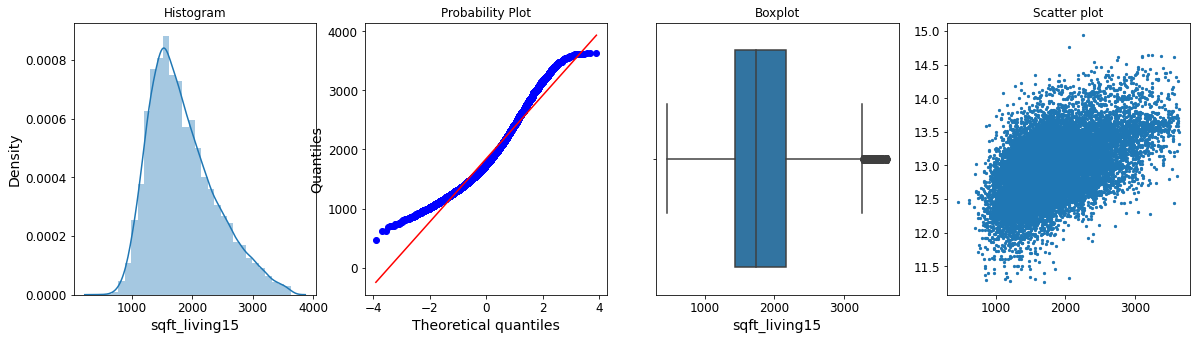

sqft_lot
Skewness: 2.163069
Kurtosis: 9.870122


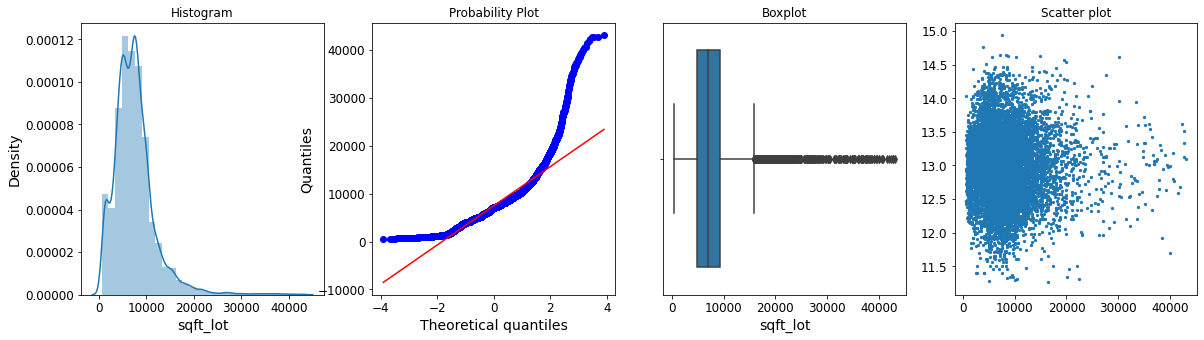

sqft_lot15
Skewness: 0.613644
Kurtosis: 0.807345


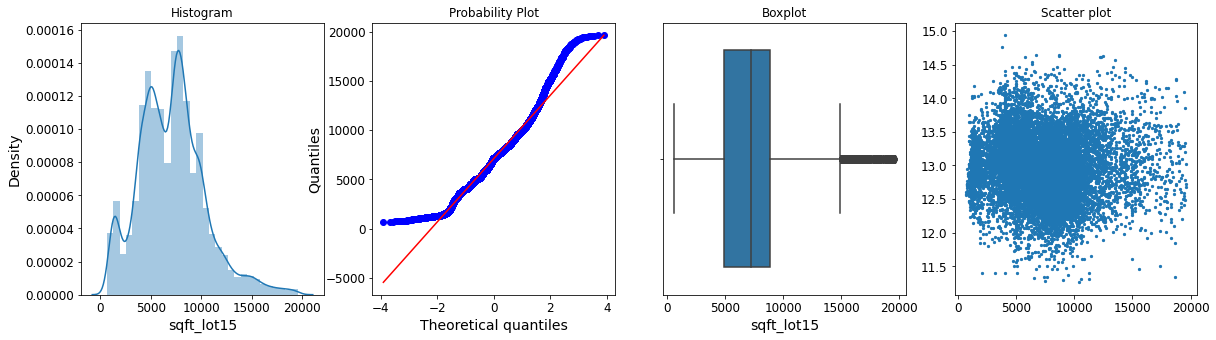

sqft_above
Skewness: 0.856625
Kurtosis: 0.068039


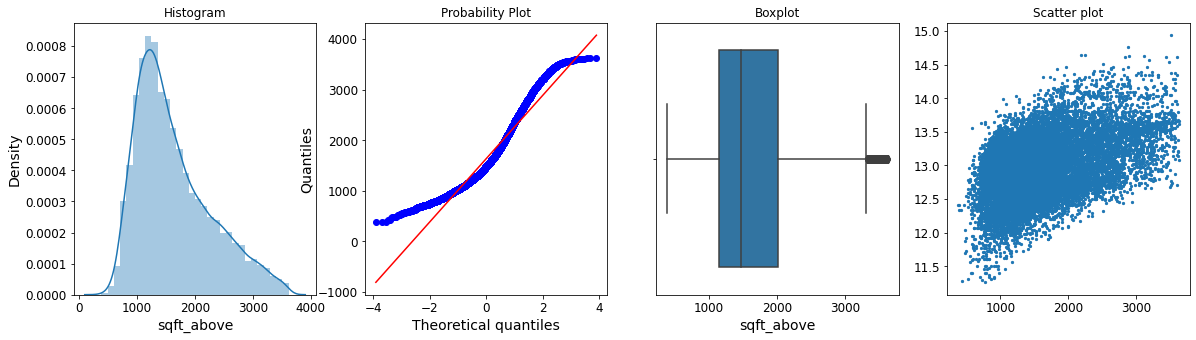

bedrooms
Skewness: 2.880810
Kurtosis: 82.862409


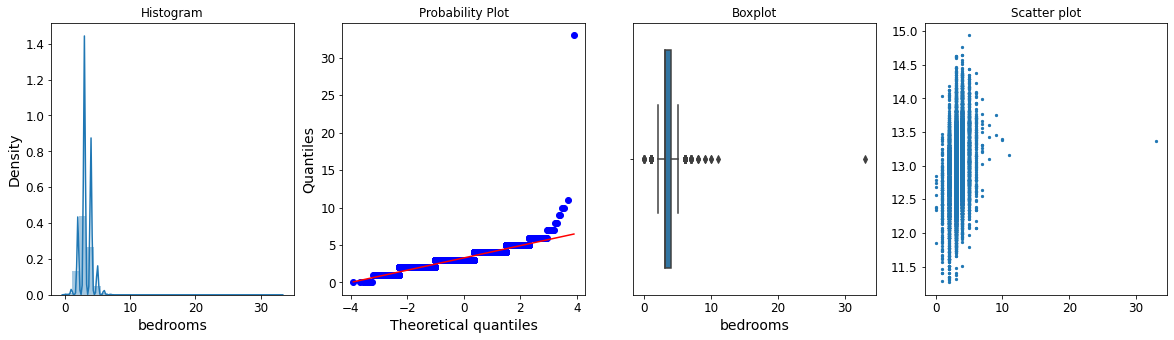

sqft_basement
Skewness: 1.147467
Kurtosis: -0.167175


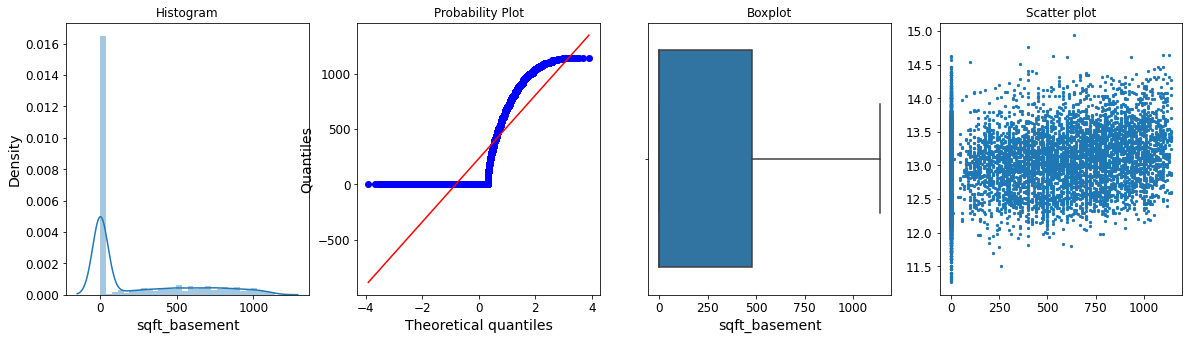

In [30]:
for var in outlier_vars:
    print(var)
    analyze_continuous_var(df_train[var], df_train['log_price'])

#### new pipeline with fixing linear violation

In [31]:
def fixing_linear_assumption_pipeline(df, train_flag=0):
    
    outlier_dict = {'sqft_living':4610, 'sqft_living15':3770, 'sqft_lot':43560, 
                    'sqft_lot15':19647, 'sqft_above':4070.0, 'sqft_basement':1150, 
                    'bedrooms':10}
    
    df = clean_data(df)
    for var in outlier_dict:
        df.loc[df[var] >= outlier_dict[var], var] = outlier_dict[var]
    # generate season feature
    df['season'] = generate_season(df, 'date')
    # create sqft_ratio feature
    df['sqft_ratio'] = sqft_ratio(df, 'sqft_living', 'sqft_living15')
    # encode zipcode
    df = encode_categorical(df, ['zipcode'], TARGET, train_flag)
    # fixing outliers
    df = fixing_outliers(df, outlier_dict)
    # scaling numerical var
    num_df = scaling_data(df, TRAIN_NUMERICAL_VARS, train_flag)
    # create dummy vars for categorical vars
    cat_df = create_dummy_vars(df, ['season'], train_flag)
    # merge num_df and cat_df
    df = pd.concat([num_df, cat_df], axis=1)
    
    return df

#### split data

In [32]:
# split data
X_train, X_test, y_train, y_test = train_test_split(df, df[TARGET], test_size=0.2, random_state=0)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

#### preprocessing data

In [33]:
X_train = fixing_linear_assumption_pipeline(X_train, train_flag=1)
X_test = fixing_linear_assumption_pipeline(X_test)
TRAIN_VARS = list(X_train.columns)

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)
df_train['price'] = y_train
y_train = np.log(y_train)
df_test['price'] = y_test
y_test = np.log(y_test)

df_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,sqft_ratio,zipcode,season_spring,season_summer,season_winter,price
0,0.300,0.125,0.296,0.116,0.000,0.000,0.000,0.750,0.500,0.206,0.435,0.348,0.000,0.866,0.163,0.407,0.302,0.122,0.710,0,0,1,495000.000
1,0.300,0.250,0.345,0.243,0.000,0.000,0.000,0.750,0.583,0.243,0.496,0.696,0.000,0.646,0.304,0.567,0.476,0.102,0.899,0,1,0,635000.000
2,0.300,0.125,0.185,0.217,0.000,0.000,0.000,0.500,0.583,0.212,0.000,0.757,0.000,0.756,0.399,0.389,0.485,0.079,0.812,1,0,0,382500.000
3,0.400,0.250,0.444,0.152,0.500,0.000,0.000,0.500,0.583,0.508,0.000,0.809,0.000,0.426,0.276,0.466,0.334,0.162,0.130,0,1,0,382500.000
4,0.300,0.250,0.350,0.099,0.500,0.000,0.000,0.500,0.500,0.251,0.487,0.739,0.000,0.788,0.127,0.413,0.216,0.142,0.884,0,0,0,670000.000


In [34]:
import statsmodels.api as sm

# Add a constant (adding a new column (equal in lenght to x), which consists only of 1s)
X_bias = sm.add_constant(X_train)
# Fit the model
lr_model = sm.OLS(y_train, X_bias).fit()

In [35]:
pd.options.display.max_rows = 300
pd.set_option('display.float_format', lambda x: '%.3f' % x)
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     4672.
Date:                Tue, 08 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:28:39   Log-Likelihood:                 3242.0
No. Observations:               17290   AIC:                            -6438.
Df Residuals:                   17267   BIC:                            -6260.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.2262      0.020    565.338      0.000      11.187      11.265
bedrooms         -0.0867      0.022     -3.911      0.000      -0.130      -0.043
bathrooms         0.3200      0.026     12.528      0.000       0.270       0.370
sqft_living      -0.0471      0.076     -0.617      0.537      -0.197       0.103
sqft_lot          0.1719      0.013     13.734      0.000       0.147       0.196
floors           -0.0029      0.009     -0.335      0.738      -0.020       0.014
waterfront        0.4335      0.019     23.012      0.000       0.397       0.470
view              0.2480      0.009     26.166      0.000       0.229       0.267
condition         0.2124      0.011     20.195      0.000       0.192       0.233
grade             1.2092      0.029     41.082      0.000       1.152       1.267
sqft_above        0.5897      0.064      9.172      0.000       0.464       0.716
sqft_basement     0.1313      0.021      6.404      0.000       0.091       0.172
yr_built         -0.1556      0.010    -16.335      0.000      -0.174      -0.137
yr_renovated      0.0624      0.008      7.686      0.000       0.046       0.078
lat               0.2646      0.009     28.742      0.000       0.247       0.283
long             -0.4081      0.017    -24.254      0.000      -0.441      -0.375
sqft_living15     0.4509      0.032     14.261      0.000       0.389       0.513
sqft_lot15       -0.1624      0.012    -13.133      0.000      -0.187      -0.138
sqft_ratio        0.8863      0.088     10.095      0.000       0.714       1.058
zipcode           0.8200      0.008     99.775      0.000       0.804       0.836
season_spring     0.0502      0.004     11.907      0.000       0.042       0.058
season_summer     0.0061      0.004      1.435      0.151      -0.002       0.014
season_winter     0.0116      0.005      2.396      0.017       0.002       0.021
==============================================================================
Omnibus:                      829.922   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2622.832
Skew:                          -0.171   Prob(JB):                         0.00
Kurtosis:                       4.877   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Note**: Notice that due to multi-collinearity problem, the results is strange, sqft_living coeffient is negative value, while it should have high positive value in correspondence with the  result from data exploration. Hence, the next step should be fixing multi-collinearity problem

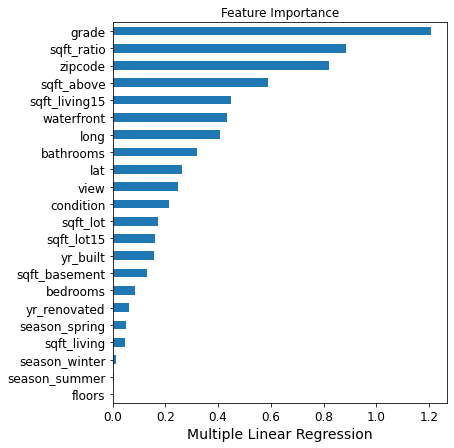

In [36]:
feature_importance = pd.Series(np.abs(lr_model.params[1:]))
feature_importance.index = TRAIN_VARS
feature_importance.sort_values(inplace=True, ascending=True)
feature_importance.plot.barh(figsize=(6, 7))
plt.xlabel('Multiple Linear Regression')
plt.title('Feature Importance')
plt.show()

### <font color=blue> 6.3. Dealing with Multicolinearity

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
variance_inflation_factor(exog=df_train[TRAIN_VARS].values, exog_idx=0)

24.397180846541485

In [39]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df_train[TRAIN_VARS].values, i) for i in range(df_train[TRAIN_VARS].shape[1])]
vif['features'] = TRAIN_VARS

vif = vif.sort_values('VIF', ascending=False)
vif

,VIF,features
2,483.984,sqft_living
9,349.442,sqft_above
8,84.055,grade
15,82.203,sqft_living15
17,56.240,sqft_ratio
10,31.555,sqft_basement
0,24.397,bedrooms
11,17.249,yr_built
7,16.000,condition
1,15.772,bathrooms


In [40]:
selected_features = [var for var in vif[vif.VIF > 10].features]
print(selected_features)

['sqft_living', 'sqft_above', 'grade', 'sqft_living15', 'sqft_ratio', 'sqft_basement', 'bedrooms', 'yr_built', 'condition', 'bathrooms', 'lat', 'sqft_lot15']


In [41]:
selected_features = [var for var in TRAIN_VARS if var not in 
                     ['sqft_above', 'sqft_living15', 
                      'sqft_ratio', 'sqft_basement', 'bedrooms', 'yr_built', 
                      'bathrooms', 'lat', 'sqft_lot15']
                    ]

selected_features

['sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'yr_renovated',
 'long',
 'zipcode',
 'season_spring',
 'season_summer',
 'season_winter']

In [42]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df_train[selected_features].values, i) for i in range(df_train[selected_features].shape[1])]
vif['features'] = selected_features

vif = vif.sort_values('VIF', ascending=False)
vif

,VIF,features
6,36.685,grade
5,11.870,condition
0,11.209,sqft_living
8,6.579,long
9,5.080,zipcode
1,2.666,sqft_lot
2,2.416,floors
10,2.232,season_spring
11,2.220,season_summer
12,1.695,season_winter


---
---
[content table](#content_table)
<a id="lr_fixing"></a>
# <font color=red> 7. Linear Regression after fixing violations

In [43]:
X_train = df_train[selected_features]
X_test = df_test[selected_features]

### <font color=blue> 7.1. Train as multiple linear regression model

In [44]:
import statsmodels.api as sm

# Add a constant (adding a new column (equal in lenght to x), which consists only of 1s)
X_bias = sm.add_constant(X_train)
# Fit the model
lr_model = sm.OLS(y_train, X_bias).fit()

### <font color=blue> 7.2. Result Summary & Interpretation

In [45]:
pd.options.display.max_rows = 300
pd.set_option('display.float_format', lambda x: '%.3f' % x)
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     7053.
Date:                Tue, 08 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:28:41   Log-Likelihood:                 2399.7
No. Observations:               17290   AIC:                            -4771.
Df Residuals:                   17276   BIC:                            -4663.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.4447      0.014    798.807      0.000      11.417      11.473
sqft_living       0.9984      0.013     76.665      0.000       0.973       1.024
sqft_lot          0.0606      0.008      7.614      0.000       0.045       0.076
floors            0.0195      0.007      2.770      0.006       0.006       0.033
waterfront        0.4147      0.020     21.078      0.000       0.376       0.453
view              0.2435      0.010     25.193      0.000       0.225       0.262
condition         0.2115      0.010     20.152      0.000       0.191       0.232
grade             1.1659      0.028     41.522      0.000       1.111       1.221
yr_renovated      0.0967      0.008     12.011      0.000       0.081       0.112
long             -0.5685      0.015    -37.117      0.000      -0.599      -0.539
zipcode           1.0070      0.006    158.553      0.000       0.995       1.019
season_spring     0.0504      0.004     11.406      0.000       0.042       0.059
season_summer     0.0054      0.004      1.215      0.224      -0.003       0.014
season_winter     0.0115      0.005      2.252      0.024       0.001       0.021
==============================================================================
Omnibus:                      633.752   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1752.790
Skew:                          -0.123   Prob(JB):                         0.00
Kurtosis:                       4.540   Cond. No.                         31.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
lr_model.rsquared, lr_model.bic

(0.8414508873322778, -4662.876244086748)

In [47]:
pd.DataFrame({'coef': lr_model.params, 'p-value': round(lr_model.pvalues,3)})

,coef,p-value
const,11.445,0.000
sqft_living,0.998,0.000
sqft_lot,0.061,0.000
floors,0.020,0.006
waterfront,0.415,0.000
view,0.244,0.000
condition,0.211,0.000
grade,1.166,0.000
yr_renovated,0.097,0.000
long,-0.569,0.000


### <font color=blue> 7.3. Feature Selection

It is best to remove only one variable from the model at a time. This is because when one variable is removed from the model and subsequent reduced model is fitted, the p-values of the remaining input variables in the model usually change. 
 
There are several ways to remove unimportant variables:

#### Step forward

In forward selection, we start with a null model and then start fitting the model with each individual feature one at a time and select the feature with the minimum p-value. Now fit a model with two features by trying combinations of the earlier selected feature with all other remaining features. Again select the feature with the minimum p-value. Now fit a model with three features by trying combinations of two previously selected features with other remaining features. Repeat this process until we have a set of selected features with a p-value of individual features less than the significance level.

In short, the steps for the forward selection technique are as follows :

1. Choose a significance level (e.g. SL = 0.05 with a 95% confidence).

2. Fit all possible simple regression models by considering one feature at a time. Total ’n’ models are possible. Select the feature with the lowest p-value.

3. Fit all possible models with one extra feature added to the previously selected feature(s).

4. Again, select the feature with a minimum p-value. if p_value < significance level then go to Step 3, otherwise terminate the process.


#### Step backward eliminination

In backward elimination, we start with the full model (including all the independent variables) and then remove the insignificant feature with the highest p-value(> significance level). This process repeats again and again until we have the final set of significant features.

In short, the steps involved in backward elimination are as follows:

1. Choose a significance level (e.g. SL = 0.05 with a 95% confidence).

2. Fit a full model including all the features.

3. Consider the feature with the highest p-value. If the p-value > significance level then go to Step 4, otherwise terminate the process.

4. Remove the feature which is under consideration.

Fit a model without this feature. Repeat the entire process from Step 3.


#### Bi-directional elimination(Step-wise Selection)

It is similar to forward selection but the difference is while adding a new feature it also checks the significance of already added features and if it finds any of the already selected features insignificant then it simply removes that particular feature through backward elimination.

Hence, It is a combination of forward selection and backward elimination.

In short, the steps involved in bi-directional elimination are as follows:

1. Choose a significance level to enter and exit the model (e.g. SL_in = 0.05 and SL_out = 0.05 with 95% confidence).

2. Perform the next step of forward selection (newly added feature must have p-value < SL_in to enter).

3. Perform all steps of backward elimination (any previously added feature with p-value>SL_out is ready to exit the model).

Repeat steps 2 and 3 until we get a final optimal set of features.

In [48]:
import statsmodels.api as sm

def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features


def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features


In [49]:
#best_features = forward_selection(X_train,y_train)
#best_features = backward_elimination(X_train,y_train)
best_features = stepwise_selection(X_train,y_train)

print(best_features)

['view', 'zipcode', 'grade', 'sqft_living', 'long', 'waterfront', 'condition', 'season_spring', 'yr_renovated', 'sqft_lot', 'floors']


### <font color=blue> 7.4. Pretrain model with important features

In [50]:
X_train = X_train[best_features]
X_test = X_test[best_features]
# Add a constant (adding a new column (equal in lenght to x), which consists only of 1s)
X_bias = sm.add_constant(X_train)
# Fit the model
lr_model = sm.OLS(y_train, X_bias).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     8333.
Date:                Tue, 08 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:28:43   Log-Likelihood:                 2397.2
No. Observations:               17290   AIC:                            -4770.
Df Residuals:                   17278   BIC:                            -4677.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.4500      0.014    811.584      0.000      11.422      11.478
view              0.2435      0.010     25.188      0.000       0.225       0.262
zipcode           1.0066      0.006    158.550      0.000       0.994       1.019
grade             1.1663      0.028     41.540      0.000       1.111       1.221
sqft_living       0.9986      0.013     76.678      0.000       0.973       1.024
long             -0.5686      0.015    -37.120      0.000      -0.599      -0.539
waterfront        0.4147      0.020     21.076      0.000       0.376       0.453
condition         0.2110      0.010     20.128      0.000       0.190       0.232
season_spring     0.0453      0.003     12.975      0.000       0.038       0.052
yr_renovated      0.0964      0.008     11.975      0.000       0.081       0.112
sqft_lot          0.0605      0.008      7.607      0.000       0.045       0.076
floors            0.0192      0.007      2.733      0.006       0.005       0.033
==============================================================================
Omnibus:                      632.385   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1750.386
Skew:                          -0.121   Prob(JB):                         0.00
Kurtosis:                       4.540   Cond. No.                         30.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <font color=blue> 7.5. Analysis of fitted model

#### Prediction

In [51]:
pred_train = lr_model.predict(sm.add_constant(X_train))
actual_pred_train = np.exp(pred_train)
print('Train prediction: ', list(actual_pred_train[0:3]))
print('Train true label: ', list(df_train['price'][0:3]))
print()

pred_test = lr_model.predict(sm.add_constant(X_test))
actual_pred_test = np.exp(pred_test)
print('Test prediction: ', list(actual_pred_test[0:3]))
print('Test true label: ', list(df_test['price'][0:3]))
print()
print('Average house price: ', df_train['price'].median())

Train prediction:  [497175.9696751875, 646414.9579635812, 474266.83322047023]
Train true label:  [495000.0, 635000.0, 382500.0]

Test prediction:  [351173.04686253204, 1896467.784596601, 408964.0249070655]
Test true label:  [297000.0, 1578000.0, 562100.0]

Average house price:  453000.0


#### Calculate r-square

In [52]:
lr_model.rsquared

0.8414041438432024

#### MSE and RMSE

In [53]:
def performance_evaluation(pred_train, pred_test, y_train, y_test):   
    print('Train mse: {}'.format(mean_squared_error(y_train, pred_train)))
    print('Train rmse: {}'.format(sqrt(mean_squared_error(y_train, pred_train))))
    print()
    print('Test mse: {}'.format(mean_squared_error(y_test, pred_test)))
    print('Test rmse: {}'.format(sqrt(mean_squared_error(y_test, pred_test))))

In [54]:
performance_evaluation(actual_pred_train, actual_pred_test, df_train['price'], df_test['price'])

Train mse: 26073045818.622032
Train rmse: 161471.50156799197

Test mse: 22823779649.988045
Test rmse: 151075.41047433246


#### Feature importance

In [55]:
pd.options.display.max_rows = 300
pd.set_option('display.float_format', lambda x: '%.3f' % x)
lr_model.params

const           11.450
view             0.244
zipcode          1.007
grade            1.166
sqft_living      0.999
long            -0.569
waterfront       0.415
condition        0.211
season_spring    0.045
yr_renovated     0.096
sqft_lot         0.061
floors           0.019
dtype: float64

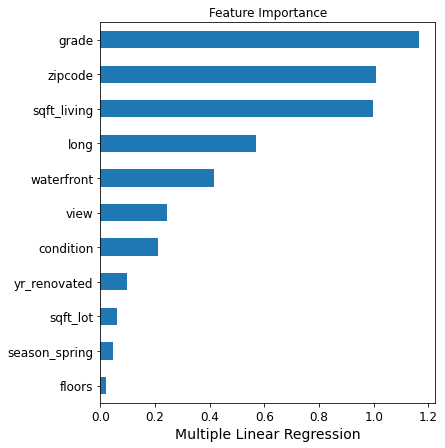

In [56]:
feature_importance = pd.Series(np.abs(lr_model.params[1:]))
feature_importance.index = best_features
feature_importance.sort_values(inplace=True, ascending=True)
feature_importance.plot.barh(figsize=(6, 7))
plt.xlabel('Multiple Linear Regression')
plt.title('Feature Importance')
plt.show()

#### Residuals Analysis

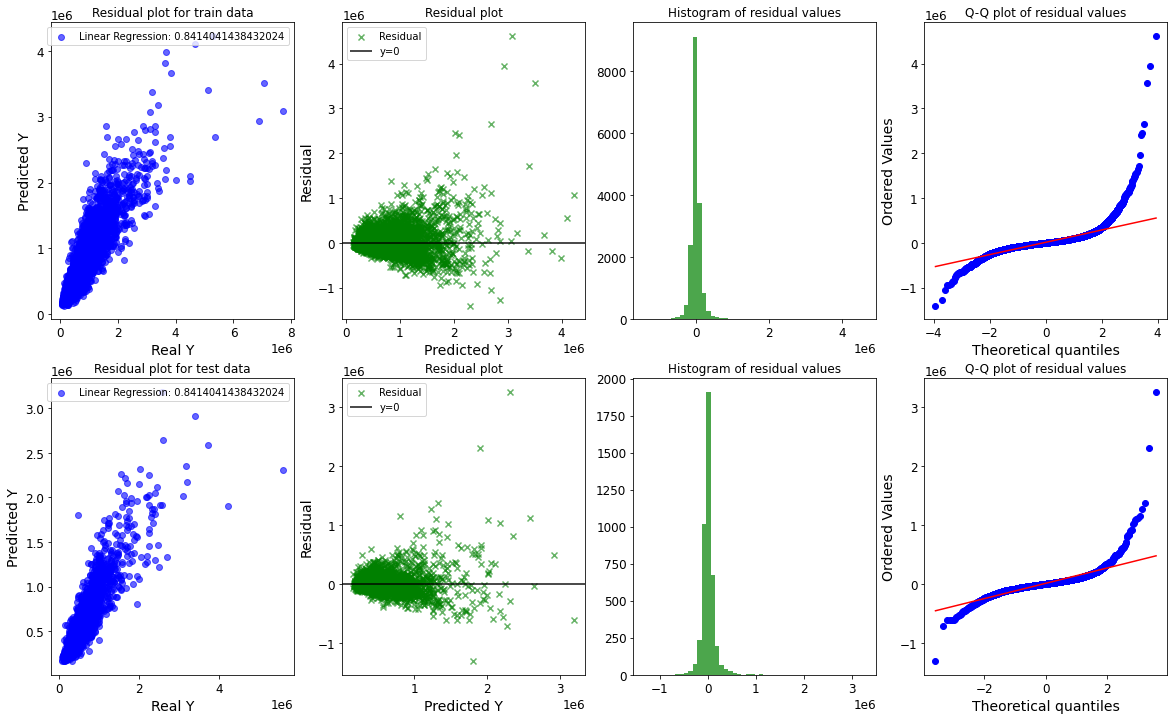

In [57]:
fig, axes = plt.subplots(2,4,figsize=(20,12))
plot_residual(axes[0][0],axes[0][1],axes[0][2],axes[0][3],actual_pred_train,df_train['price'],'Linear Regression: {}'.format(lr_model.rsquared),'Residual plot for train data')
plot_residual(axes[1][0],axes[1][1],axes[1][2],axes[1][3],actual_pred_test,df_test['price'],'Linear Regression: {}'.format(lr_model.rsquared),'Residual plot for test data')
fig.show()

- ***Predicted y vs. real y***: It seems there is relatively good fit for most of data points, except predicte values towards the highest house prices. For highest house prices, the model over-estimate the price.
    
- ***residual vs. prediction***:  the residual plot doesn't show any clear pattern, or exhibits curve and the vertical spread in the scatter plot quite small for low predicted value although residuals in higher prices are a bit higher than in lower prices. This indicates a the model fit data relatively well 

- ***Residuals distribution***: The the errors seems to follow a Gaussian distribution with mean 0
- **QQ plot**: the quantiles of residual are more aligned over the 45 degree line with the theoretical quantiles of the Gaussian distribution, however, for very high prices, the residuals lies far from the red line, this indicates that data exists outliers

---
---
[content table](#content_table)
<a id="lr_sklearn"></a>
# <font color=red> 8. Linear Regression with Sklearn

### <font color=blue> 8.1. Initialize and train model

In [58]:
# Choose a class of model
from sklearn.linear_model import LinearRegression
# Choose model hyperparameters
model = LinearRegression(fit_intercept=True)
# Fit the model to train dataset
model.fit(X_train, y_train)

LinearRegression()

### <font color=blue> 8.2. Summary Table

In [59]:
reg_summary = pd.DataFrame(data=best_features, columns=['Features'])
reg_summary['Coefficients'] = model.coef_
reg_summary['Coef_abs'] = np.abs(model.coef_)
reg_summary.sort_values('Coef_abs', ascending=False)

,Features,Coefficients,Coef_abs
2,grade,1.166,1.166
1,zipcode,1.007,1.007
3,sqft_living,0.999,0.999
4,long,-0.569,0.569
5,waterfront,0.415,0.415
0,view,0.244,0.244
6,condition,0.211,0.211
8,yr_renovated,0.096,0.096
9,sqft_lot,0.061,0.061
7,season_spring,0.045,0.045


#### Plot important features

Text(0.5, 1.0, 'Feature Importance')

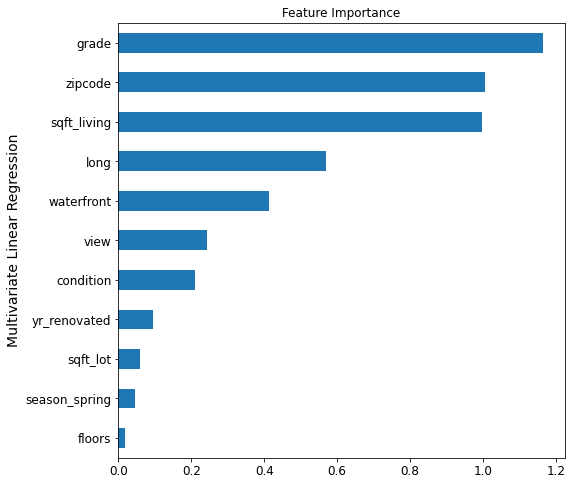

In [60]:
feature_importance = pd.Series(np.abs(model.coef_))
feature_importance.index = best_features
feature_importance.sort_values(inplace=True,ascending=True)
feature_importance.plot.barh(figsize=(8,8))
plt.ylabel('Multivariate Linear Regression')
plt.title('Feature Importance')

In [61]:
# features
lr_features = feature_importance[feature_importance > 0]
# important features
mean_value = np.round(feature_importance.mean(),3)
important_features = lr_features[lr_features > mean_value]
important_features.sort_values(inplace=True,ascending=False)
print('\nImportant features:')
print(important_features)


Important features:
grade         1.166
zipcode       1.007
sqft_living   0.999
long          0.569
dtype: float64


### <font color=blue> 8.3. Analysis of fitted model

#### <font color=green> Prediction

In [62]:
pred_train = model.predict(X_train)
actual_pred_train = np.exp(pred_train)
print('Train prediction: ',list(actual_pred_train[0:5]))
print('Train true label: ',list(df_train['price'][0:5]))
print()
pred_test = model.predict(X_test)
actual_pred_test = np.exp(pred_test)
print('Test prediction: ',list(actual_pred_test[0:5]))
print('Test true label: ',list(df_test['price'][0:5]))
print()
print('Average house price: ', df_train['price'].median())

Train prediction:  [497175.9696751928, 646414.9579635916, 474266.8332204787, 318971.7080113762, 609949.7601677035]
Train true label:  [495000.0, 635000.0, 382500.0, 382500.0, 670000.0]

Test prediction:  [351173.0468625364, 1896467.7845966348, 408964.02490706986, 615631.9223533552, 659421.5513497815]
Test true label:  [297000.0, 1578000.0, 562100.0, 631500.0, 780000.0]

Average house price:  453000.0


In [63]:
train_result = pd.DataFrame(actual_pred_train, columns=['Prediction'])
train_result['Target'] = df_train['price']
train_result['Residual'] = train_result['Target'] - train_result['Prediction']
train_result['Difference%'] = np.absolute(train_result['Residual']/train_result['Target'] * 100)

test_result = pd.DataFrame(actual_pred_test, columns=['Prediction'])
test_result['Target'] = df_test['price']
test_result['Residual'] = test_result['Target'] - test_result['Prediction']
test_result['Difference%'] = np.absolute(test_result['Residual']/test_result['Target'] * 100)

pd.options.display.max_rows = 30
pd.set_option('display.float_format', lambda x: '%.2f' % x)
train_result.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
1333,498998.00,499000.00,2.00,0.00
7719,590006.04,590000.00,-6.04,0.00
1076,650005.01,649990.00,-15.01,0.00
16113,265018.74,265000.00,-18.74,0.01
1550,319475.28,319500.00,24.72,0.01
...,...,...,...,...
7565,849238.90,300523.00,-548715.90,182.59
1152,1101673.03,380000.00,-721673.03,189.91
9895,814346.26,274975.00,-539371.26,196.15
10948,317549.11,90000.00,-227549.11,252.83


#### R-squared

In [64]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print('Train R-squared: %.4f' % train_score)
print('Test R-squared: %.4f' % test_score)

Train R-squared: 0.8414
Test R-squared: 0.8392


#### MSE and RMSE

In [65]:
print('linear train mse: {}'.format(mean_squared_error(df_train['price'], actual_pred_train)))
print('linear train rmse: {}'.format(sqrt(mean_squared_error(df_train['price'], actual_pred_train))))
print()
print('linear test mse: {}'.format(mean_squared_error(df_test['price'],actual_pred_test)))
print('linear test rmse: {}'.format(sqrt(mean_squared_error(df_test['price'], actual_pred_test))))

linear train mse: 26073045818.62174
linear train rmse: 161471.50156799104

linear test mse: 22823779649.98784
linear test rmse: 151075.4104743318


#### Residual plot

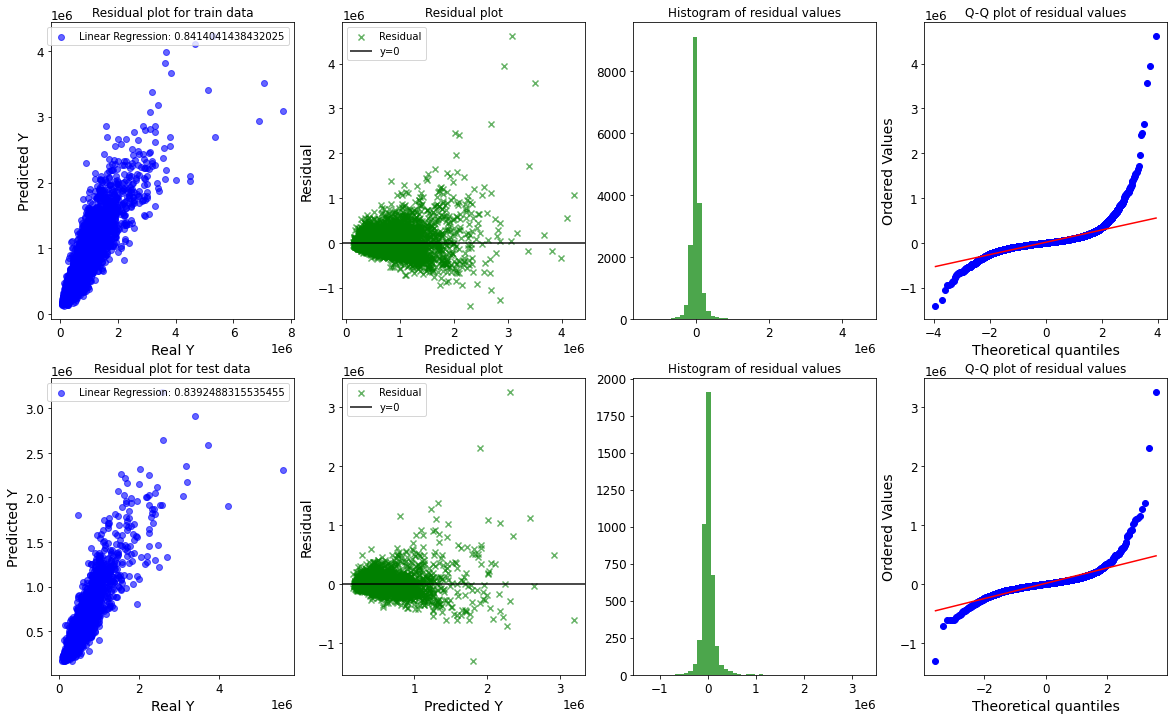

In [66]:
fig, axes = plt.subplots(2,4,figsize=(20,12))
plot_residual(axes[0][0],axes[0][1],axes[0][2],axes[0][3],actual_pred_train,df_train['price'],'Linear Regression: {}'.format(train_score),'Residual plot for train data')
plot_residual(axes[1][0],axes[1][1],axes[1][2],axes[1][3],actual_pred_test,df_test['price'],'Linear Regression: {}'.format(test_score),'Residual plot for test data')
fig.show()

## <font color=blue> 8.4.  Linear Regression Cross Validation

In [67]:
from sklearn.model_selection import cross_val_score
model = LinearRegression()
cv_scores = cross_val_score(model, X_train, y_train, scoring = 'r2', cv = 10)

rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 10))
print( "Average r2 score: ", np.round( np.mean( cv_scores ), 2 ) )
print( "Average rmse score: ", np.round( np.mean( rmse ), 2 ) )

Average r2 score:  0.84
Average rmse score:  0.21


In [68]:
TRAIN_VARS

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'sqft_ratio',
 'zipcode',
 'season_spring',
 'season_summer',
 'season_winter']

---
---
[content table](#content_table)
<a id="lasso"></a>
# <font color=red> 9. Lasso Regression Model
    
### <font color=blue> 9.1. Introduction

1. A good way to reduce overfitting is to regularize the model (i.e., to constrain it). For a linear model, regularization is typically achieved by constraining weights of the model. The model will become more complex when it has so many parameters (due to so many features). To reduce the complexity of the model, we rather than just minimizing the average squared loss L, we could minimize a regularized loss L' made by adding together the squared loss function and a term penalizing over-complexity

2. A regression model that uses L1 regularization technique is called Lasso Regression. The following is the cost function of Lasso Regression

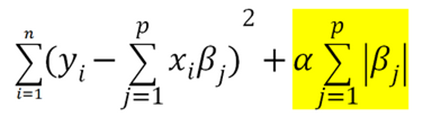

3. An important characteristics of Lasso Regression is that it tends to shrinks the less important feature's coefficient to zero thus, as the result, using the Lasso regularisation to remove non-important features from the dataset. So, this works well for feature selection in case we have a large number of features

### <font color=blue> 9.2. Train model
    
1. Choosing the value of penalisation λ presents us with the same overfitting/generalization trade-off. If it is too small, our funtion is likely to be complex. If it is too large, we will not capture any useful trends in the data. This is because increasing the penalisation will increase the number of features removed, you should notice a drop in the performance of the algorithm and then realise that you need to decrease the regularisation.

2. Therefore, you will need to keep an eye and monitor that you don't set a penalty too high so that to remove even important features, or too low and then not remove non-important features. We can use the cross-validation technique to determine the best value of λ

#### split data

In [69]:
# split data
X_train, X_test, y_train, y_test = train_test_split(df, df[TARGET], test_size=0.2, random_state=0)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

#### preprocessing data

In [70]:
X_train = fixing_linear_assumption_pipeline(X_train, train_flag=1)
X_test = fixing_linear_assumption_pipeline(X_test)
TRAIN_VARS = list(X_train.columns)

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)
df_train['price'] = y_train
y_train = np.log(y_train)
df_test['price'] = y_test
y_test = np.log(y_test)

df_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,sqft_ratio,zipcode,season_spring,season_summer,season_winter,price
0,0.30,0.12,0.30,0.12,0.00,0.00,0.00,0.75,0.50,0.21,0.43,0.35,0.00,0.87,0.16,0.41,0.30,0.12,0.71,0,0,1,495000.00
1,0.30,0.25,0.34,0.24,0.00,0.00,0.00,0.75,0.58,0.24,0.50,0.70,0.00,0.65,0.30,0.57,0.48,0.10,0.90,0,1,0,635000.00
2,0.30,0.12,0.19,0.22,0.00,0.00,0.00,0.50,0.58,0.21,0.00,0.76,0.00,0.76,0.40,0.39,0.48,0.08,0.81,1,0,0,382500.00
3,0.40,0.25,0.44,0.15,0.50,0.00,0.00,0.50,0.58,0.51,0.00,0.81,0.00,0.43,0.28,0.47,0.33,0.16,0.13,0,1,0,382500.00
4,0.30,0.25,0.35,0.10,0.50,0.00,0.00,0.50,0.50,0.25,0.49,0.74,0.00,0.79,0.13,0.41,0.22,0.14,0.88,0,0,0,670000.00


In [71]:
ls1 = Lasso(alpha=0.01, random_state=9)  # remember to set the random_state / seed
ls1.fit(X_train, y_train)

train_score = ls1.score(X_train, y_train)
test_score = ls1.score(X_test, y_test)
print('Train R-squared: %.4f' % train_score)
print('Test R-squared: %.4f' % test_score)

feature_importance = pd.Series(np.abs(ls1.coef_))
feature_importance.index = TRAIN_VARS
feature_importance.sort_values(inplace=True, ascending=False)
feature_importance

Train R-squared: 0.7882
Test R-squared: 0.7896


sqft_living     1.16
zipcode         0.95
view            0.22
lat             0.07
sqft_above      0.00
bedrooms        0.00
season_summer   0.00
season_spring   0.00
sqft_ratio      0.00
sqft_lot15      0.00
sqft_living15   0.00
long            0.00
yr_built        0.00
yr_renovated    0.00
bathrooms       0.00
sqft_basement   0.00
grade           0.00
condition       0.00
waterfront      0.00
floors          0.00
sqft_lot        0.00
season_winter   0.00
dtype: float64

In [72]:
ls2 = Lasso(alpha=0.001, random_state=9) # remember to set the random_state / seed
ls2.fit(X_train, y_train)

train_score = ls2.score(X_train, y_train)
test_score = ls2.score(X_test, y_test)
print('Train R-squared: %.4f' % train_score)
print('Test R-squared: %.4f' % test_score)

feature_importance = pd.Series(np.abs(ls2.coef_))
feature_importance.index = TRAIN_VARS
feature_importance.sort_values(inplace=True,ascending=False)
feature_importance

Train R-squared: 0.8522
Test R-squared: 0.8503


grade           1.04
zipcode         0.84
sqft_living     0.63
long            0.35
sqft_above      0.35
waterfront      0.30
view            0.27
lat             0.25
condition       0.16
bathrooms       0.14
yr_built        0.13
sqft_living15   0.12
sqft_basement   0.06
yr_renovated    0.05
sqft_lot        0.05
sqft_lot15      0.04
season_spring   0.04
floors          0.01
season_summer   0.00
bedrooms        0.00
sqft_ratio      0.00
season_winter   0.00
dtype: float64

In [73]:
from sklearn.model_selection import cross_val_score
model = Lasso(alpha=0.001, random_state=9)
cv_scores = cross_val_score(model, X_train, y_train, scoring = 'r2', cv = 10)

rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 10))
print( "Average r2 score: ", np.round( np.mean( cv_scores ), 2 ) )
print( "Average rmse score: ", np.round( np.mean( rmse ), 2 ) )

Average r2 score:  0.85
Average rmse score:  0.2


### <font color=blue> 9.3. Evaluate the model

#### Prediction

In [74]:
pred_train = ls2.predict(X_train)
actual_pred_train = np.exp(pred_train)
print('Train prediction: ',list(actual_pred_train[0:5]))
print('Train true label: ',list(df_train['price'][0:5]))
print()
pred_test = ls2.predict(X_test)
actual_pred_test = np.exp(pred_test)
print('Test prediction: ',list(actual_pred_test[0:5]))
print('Test true label: ',list(df_test['price'][0:5]))
print()
print('Average house price: ', df_train['price'].median())

Train prediction:  [503786.80141407624, 603396.5471182063, 460882.088306814, 322359.6157513548, 573519.1424940141]
Train true label:  [495000.0, 635000.0, 382500.0, 382500.0, 670000.0]

Test prediction:  [362782.41922252637, 1780691.9371785403, 426741.58986776567, 602639.7319744299, 722180.2391397299]
Test true label:  [297000.0, 1578000.0, 562100.0, 631500.0, 780000.0]

Average house price:  453000.0


#### R-squared

In [75]:
train_score = ls2.score(X_train, y_train)
test_score = ls2.score(X_test, y_test)
print('Train R-squared: %.4f' % train_score)
print('Test R-squared: %.4f' % test_score)

Train R-squared: 0.8522
Test R-squared: 0.8503


#### MSE and RMSE

In [76]:
print('linear train mse: {}'.format(mean_squared_error(df_train['price'], actual_pred_train)))
print('linear train rmse: {}'.format(sqrt(mean_squared_error(df_train['price'], actual_pred_train))))
print()
print('linear test mse: {}'.format(mean_squared_error(df_test['price'],actual_pred_test)))
print('linear test rmse: {}'.format(sqrt(mean_squared_error(df_test['price'], actual_pred_test))))

linear train mse: 26024071688.04039
linear train rmse: 161319.78083310302

linear test mse: 22825548190.413
linear test rmse: 151081.2635319582


#### Resiual Analysis

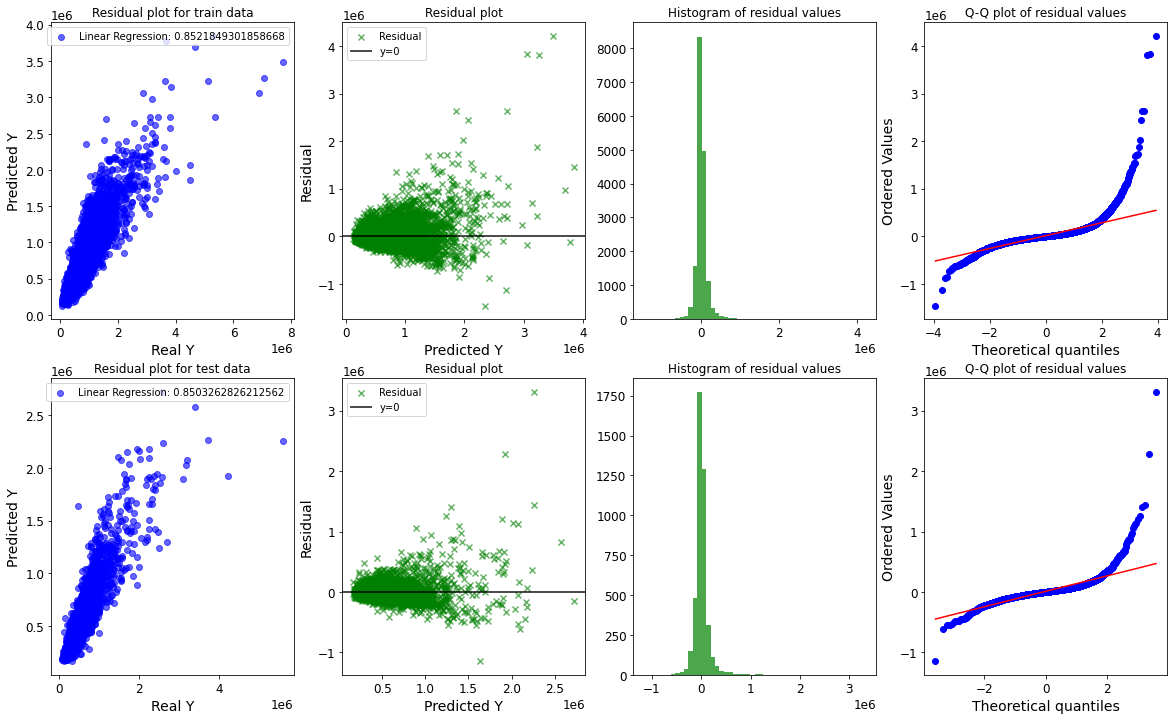

In [77]:
fig, axes = plt.subplots(2,4,figsize=(20,12))
plot_residual(axes[0][0],axes[0][1],axes[0][2],axes[0][3],actual_pred_train,df_train['price'],'Linear Regression: {}'.format(train_score),'Residual plot for train data')
plot_residual(axes[1][0],axes[1][1],axes[1][2],axes[1][3],actual_pred_test,df_test['price'],'Linear Regression: {}'.format(test_score),'Residual plot for test data')
fig.show()

#### Important features

In [78]:
# features
lasso_features = feature_importance[feature_importance > 0]
# important features
mean_value = np.round(feature_importance.mean(),3)
important_features = lasso_features[lasso_features > mean_value]
important_features.sort_values(inplace=True,ascending=False)
print('\nImportant features:')
print(important_features)


Important features:
grade         1.04
zipcode       0.84
sqft_living   0.63
long          0.35
sqft_above    0.35
waterfront    0.30
view          0.27
lat           0.25
dtype: float64


Text(0.5, 1.0, 'Feature Importance')

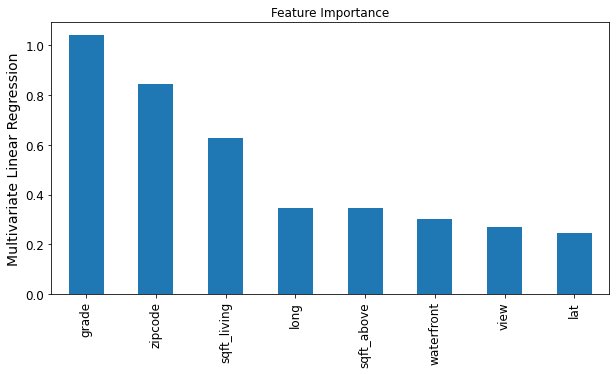

In [79]:
important_features.plot.bar(figsize=(10,5))
plt.ylabel('Multivariate Linear Regression')
plt.title('Feature Importance')